# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

# 1. 데이터 확인
데이터의 예시와 shape, info, 결측치 개수 등을 확인

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv("assignment3_creditcard.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28678 non-null  float64
 1   V2      28678 non-null  float64
 2   V3      28678 non-null  float64
 3   V4      28678 non-null  float64
 4   V5      28678 non-null  float64
 5   V6      28678 non-null  float64
 6   V7      28678 non-null  float64
 7   V8      28678 non-null  float64
 8   V9      28678 non-null  float64
 9   V10     28678 non-null  float64
 10  V11     28678 non-null  float64
 11  V12     28678 non-null  float64
 12  V13     28678 non-null  float64
 13  V14     28678 non-null  float64
 14  V15     28678 non-null  float64
 15  V16     28678 non-null  float64
 16  V17     28678 non-null  float64
 17  V18     28678 non-null  float64
 18  V19     28678 non-null  float64
 19  V20     28678 non-null  float64
 20  V21     28678 non-null  float64
 21  V22     28678 non-null  float64
 22

In [5]:
pd.DataFrame(data.isna().sum(), columns={'NaN 개수'})

,NaN 개수
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


# 2. 로지스틱 회귀 모델
sklearn 패키지의 linear_model의 LogisticRegression을 이용하여 로지스틱 회귀 모델을 만든다.

In [6]:
# X, y split
X = data.drop(["Class"], axis=1)
y = data.Class

In [7]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,0.159752,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,0.644970,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,-0.885471,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.663398,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.531789,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001


In [8]:
y # 우리가 예측하고자 하는 y는 범주형 변수임. 따라서 로지스틱 회귀 사용

0        0
1        0
2        0
3        0
4        0
        ..
28673    0
28674    0
28675    0
28676    0
28677    0
Name: Class, Length: 28678, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# 8:2로 train, test set split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, 
                                                    shuffle=False, 
                                                    random_state=808) # random seed를 808로 고정시켜주었다.

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22942, 28)
(5736, 28)
(22942,)
(5736,)


train set의 행수는 22942, test set의 행수는 5736이다.

In [12]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,0.159752,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,0.644970,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,-0.885471,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.663398,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.531789,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001


In [13]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
22937    0
22938    0
22939    0
22940    0
22941    0
Name: Class, Length: 22942, dtype: int64

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
print(model.score(X_train, y_train)) # 학습 모델 정확도 Accuracy 99.80%

0.9979949437712492


In [18]:
print(model.score(X_test, y_test)) # 학습 모델 정확도 Accuracy 99.79%

0.997907949790795


train set으로 모형의 Accuracy를 확인했을 때 99.80%의 정확도를 가졌고, test set으로 확인했을 때 99.79%의 정확도를 가져 모형이 적합함을 확인할 수 있었다.

In [19]:
print(model.coef_)

[[ 0.0719442  -0.08449276  0.01259509  0.84597483 -0.00407458 -0.17339153
  -0.07878959 -0.20970392 -0.05060955 -0.70345777  0.11383319 -0.37470834
  -0.25683254 -0.62683622 -0.23116277 -0.30182772  0.11363854 -0.22392314
  -0.00890725 -0.29001714  0.42230352  0.66400619 -0.08217785  0.09817019
  -0.2735871  -0.36667462 -0.61871224 -0.06877738]]


In [20]:
from sklearn.metrics import *

In [21]:
cm = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)
print(cm)

[[5695    4]
 [   8   29]]


tn 값이 5695, fp 값이 4, fn 값이 8, tp 값이 29임을 확인할 수 있다.

In [22]:
accuracy_score(y_test, y_pred)

0.997907949790795

mean accuracy는 99.79%

In [23]:
precision_score(y_test, y_pred)

0.8787878787878788

precision_score는 87.88%

In [24]:
recall_score(y_test, y_pred)

0.7837837837837838

recall_score는 78.38%

In [25]:
f1_score(y_test, y_pred)

0.8285714285714285

f1_score는 87.86%

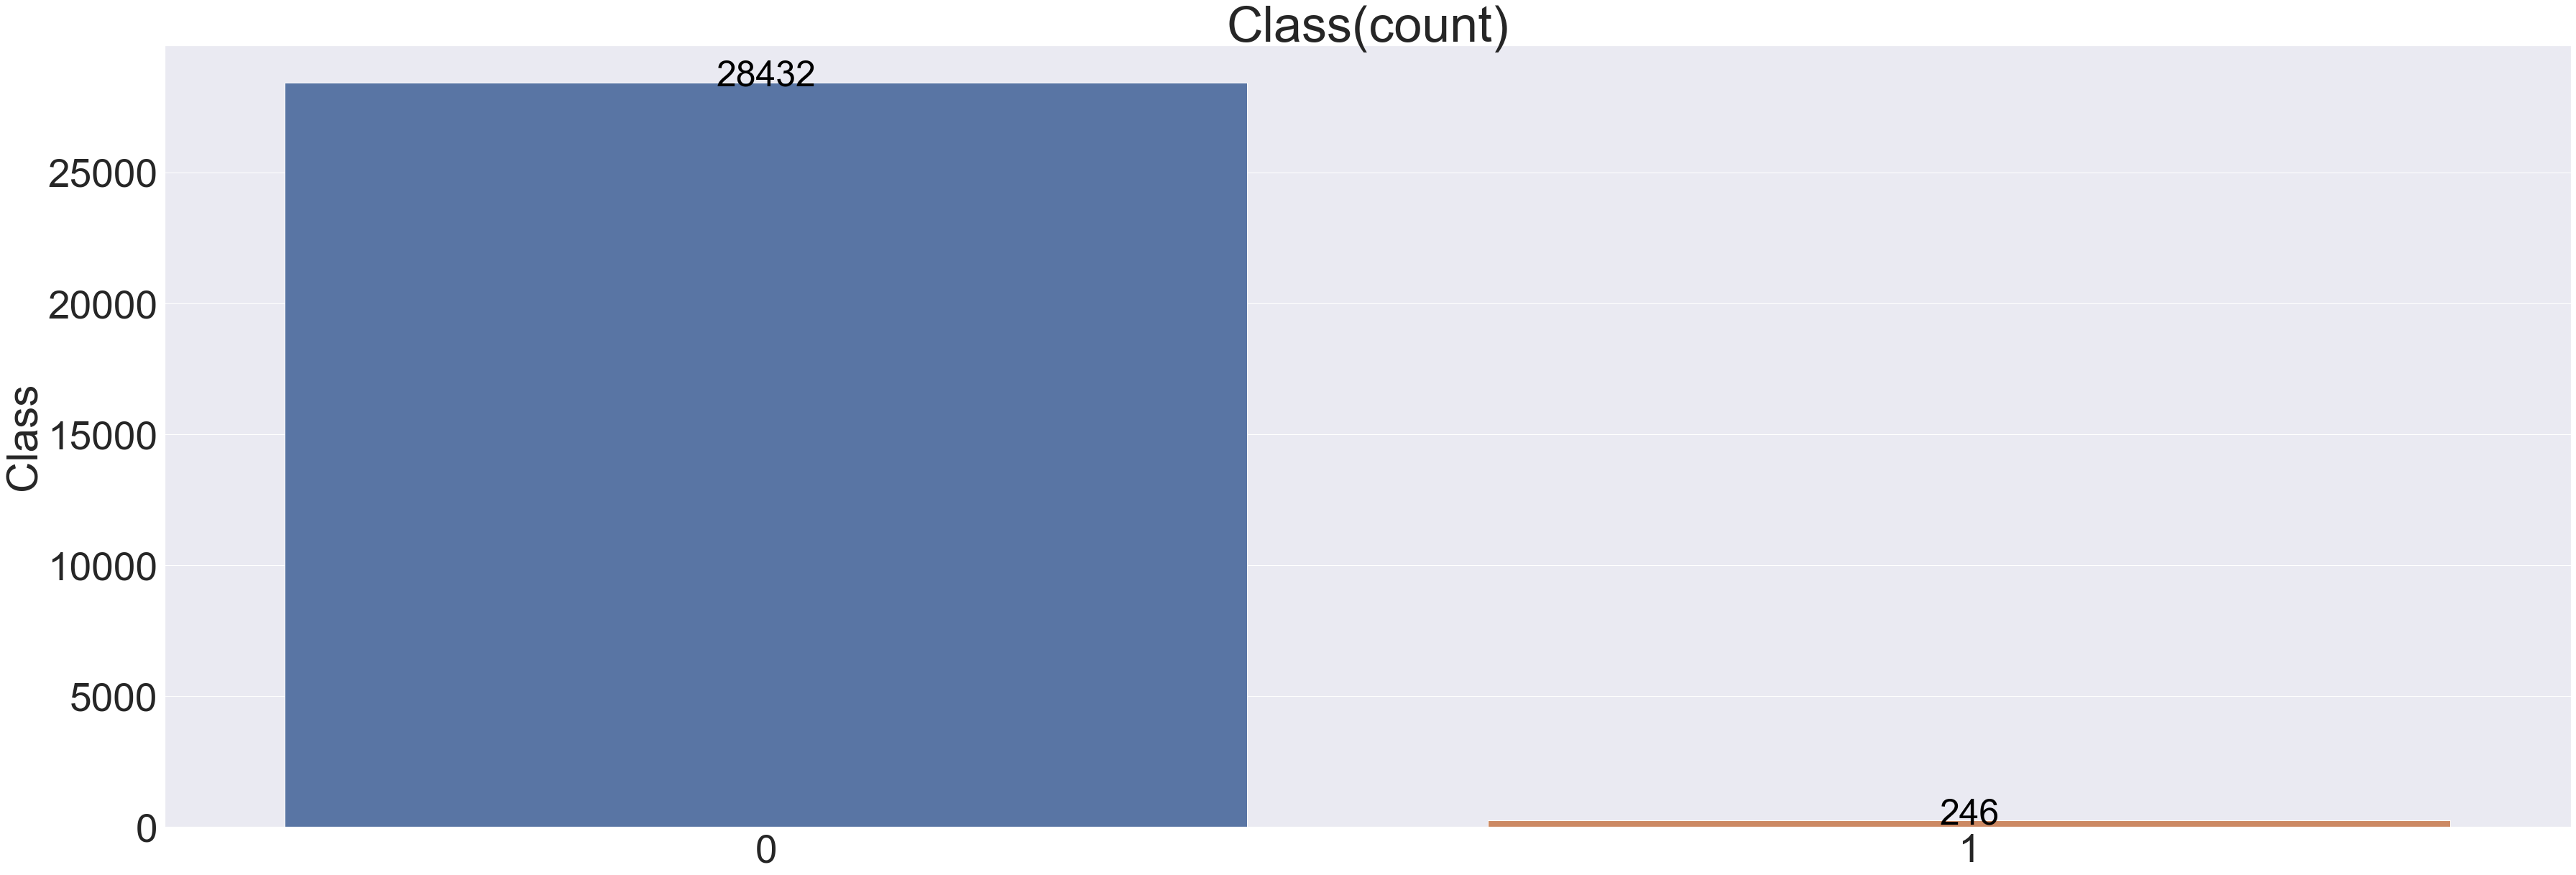

In [26]:
# target 변수인 Class의 범주별 데이터 개수 확인
sns.set(font_scale = 5)
vc_tmp = pd.DataFrame(data['Class'].value_counts())
plt.figure(figsize=(60, 20), facecolor='white')
g = sns.barplot(x= vc_tmp.index, y=vc_tmp['Class'])
ax = g

# 각 범주별 데이터 개수 확인
for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=50, color='black', xytext=(0, 10), 
       textcoords='offset points') 

plt.title("%s(count)"%'Class', fontsize=70)
plt.show()

In [27]:
data['Class'].value_counts()

0    28432
1      246
Name: Class, dtype: int64

In [28]:
y_test.value_counts()

0    5699
1      37
Name: Class, dtype: int64

In [29]:
5699/(5699+37)*100

99.35495118549512

이 데이터는 예측하려고하는 변수인 Class의 범주 불균형이 심한 편이다. 특히, 0인 데이터(negative)가 매우 많으므로 사실상 test set에 대해 Class를 모두 0으로 예측해버렸다고 해도 정확도는 5699/(5699+37)*100 = 99.35%가 나왔을 것이다. 이처럼 데이터의 범주가 불균형할 경우 단순히 정확도로 모형을 평가하는 것은 적절치 못하다. <br><br>
실제로, Accuracy와 precision_score, recall_score를 확인했을 때 모두 Accuracy보다 낮은 값을 가지는 것을 확인할 수 있었다. <br>
precision_score = TP/(TP+FP) <br>
recall_score = TP/(TP+FN) <br>
<br>
또한 precision_score와 recall_score를 이용해 구할 수 있는 f1_score의 값도 accuracy 보다 낮음을 확인할 수 있다.<br>
f1_score = (2 * precision_score * recall_score) / (precision_score + recall_score) <br><br>

이 데이터의 분석 목적은 **사기**임을 판단하는 것이므로 Class가 1인 값의 예측에 초점을 맞출 필요가 있다. 즉, p을 얼마나 잘 맞추느냐가 우리의 관심사이다.
따라서 p가 중점이 되는 precision_score를 모형의 지표로 선택하였다. 하지만 사기인데 사기가 아니라고 예측하면 안되는 일이기 때문에 recall_score도 precision_score만큼은 아니지만 고려해야 할 지표로 남겨둔다.

# 3. 성능 개선 시도
precision_score를 높이기 위해 임계값을 조정한다.

In [30]:
model.predict_proba(X_test)

array([[9.97767438e-01, 2.23256187e-03],
       [9.99990479e-01, 9.52130584e-06],
       [9.99236261e-01, 7.63738865e-04],
       ...,
       [9.99391073e-01, 6.08927308e-04],
       [9.97737494e-01, 2.26250558e-03],
       [9.99749488e-01, 2.50512003e-04]])

In [31]:
# 임계값을 바꿔가며 precision과 recall값의 변화를 파악!!!
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축을 정밀도, 재현율 값으로 각각의 Plot, 정밀도는 점선으로!
    plt.figure(figsize = (8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], ls = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    # threshold 값 X축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim() # 좋은 xlim 사용방법!!
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

In [32]:
sns.set()

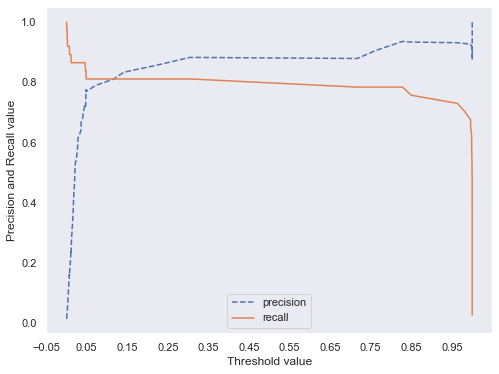

In [33]:
precision_recall_curve_plot(y_test, model.predict_proba(X_test)[:, 1])

In [34]:
from sklearn.preprocessing import Binarizer

In [35]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix (y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision_score: {1:.4f}, Recall_score: {2:.4f}\n'.format(accuracy, precision, recall))

In [36]:
threshold = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # threshold 리스트안에 있는 값들을 하나씩 임계값으로 설정하면서 confusion matrix, accuracy, precision_score, recall_score 비교 확인
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict)

In [37]:
pred_proba = model.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), threshold)

임곗값:  0.25
Confusion Matrix
[[5695    4]
 [   7   30]]
Accuracy: 0.9981, Precision_score: 0.8824, Recall_score: 0.8108

임곗값:  0.3
Confusion Matrix
[[5695    4]
 [   7   30]]
Accuracy: 0.9981, Precision_score: 0.8824, Recall_score: 0.8108

임곗값:  0.35
Confusion Matrix
[[5695    4]
 [   8   29]]
Accuracy: 0.9979, Precision_score: 0.8788, Recall_score: 0.7838

임곗값:  0.4
Confusion Matrix
[[5695    4]
 [   8   29]]
Accuracy: 0.9979, Precision_score: 0.8788, Recall_score: 0.7838

임곗값:  0.45
Confusion Matrix
[[5695    4]
 [   8   29]]
Accuracy: 0.9979, Precision_score: 0.8788, Recall_score: 0.7838

임곗값:  0.5
Confusion Matrix
[[5695    4]
 [   8   29]]
Accuracy: 0.9979, Precision_score: 0.8788, Recall_score: 0.7838

임곗값:  0.55
Confusion Matrix
[[5695    4]
 [   8   29]]
Accuracy: 0.9979, Precision_score: 0.8788, Recall_score: 0.7838

임곗값:  0.6
Confusion Matrix
[[5695    4]
 [   8   29]]
Accuracy: 0.9979, Precision_score: 0.8788, Recall_score: 0.7838

임곗값:  0.65
Confusion Matrix
[[5695    4]
 [ 

정밀도가 가장 높을 때의 임계값은 0.8이다. 이때 정밀도는 0.7838이다.<br>
우리의 목표는 재현율을 어느정도 고려하여 정밀도가 높도록 하는 임계값을 찾는 것이므로, 이 임계값은 적절하다. <br>
정밀도는 임계값이 0.8일때까지 증가하다가 0.85부터는 감소함을 확인할 수 있다.<br>
반면, 재현율은 0.3까진 0.8108이다가, 0.35부터 0.8까진 0.7838값을, 그 이후부터는 더 작은 0.7297의 값을 가짐을 확인할 수 있다. <br>
임의로 임계값을 0.5로 설정하였을 때의 재현율과 같은데, 정밀도는 더 높게 만드는 0.8을 임계값으로 설정하여 성능을 개선할 수 있다.<br>
따라서 이 둘이 적절하게 조화되는, 재현율이 높고 정밀도도 어느정도 높은 값을 가지도록 하는 임계값은 **0.8**이다. 

In [38]:
threshold = 0.8
binarizer = Binarizer(threshold = threshold).fit(pred_proba[:, 1].reshape(-1,1))
custom_predict = binarizer.transform(pred_proba[:, 1].reshape(-1,1))
print('임곗값: ', threshold)
get_clf_eval(y_test, custom_predict)

임곗값:  0.8
Confusion Matrix
[[5697    2]
 [   8   29]]
Accuracy: 0.9983, Precision_score: 0.9355, Recall_score: 0.7838



In [39]:
# 임계값 수정 후 predict 값
custom_predict

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])